In [4]:
import numpy as np
from matplotlib import pyplot as plt
from quantum.tbm.tbzincblende import *
from scipy import linalg

## Eight-Band Tight Binding Cardona Chapter 2

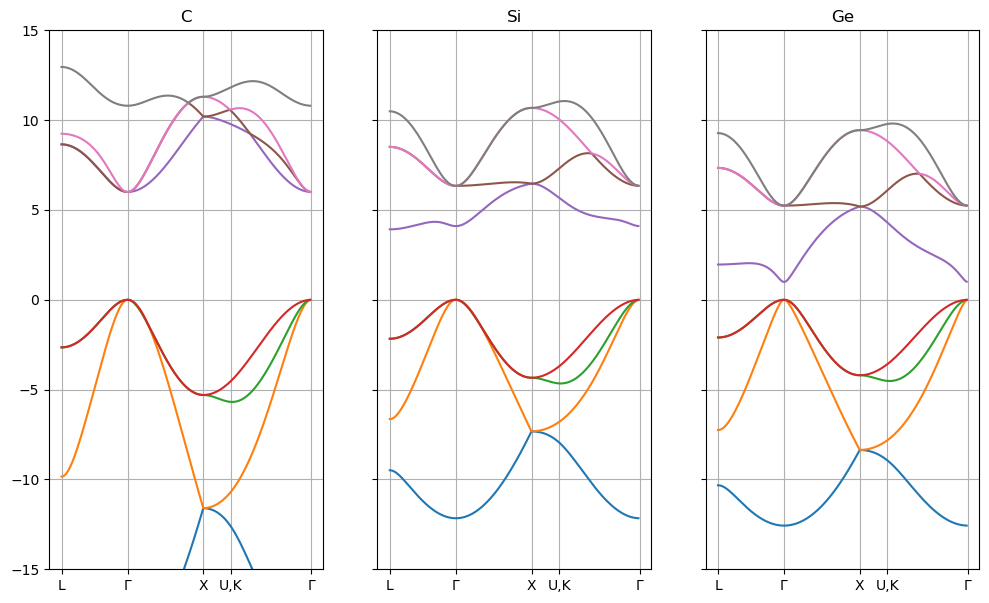

In [5]:
fig, axs = plt.subplots(figsize=(12,7),ncols=3,sharex=True,sharey=True)
i = 0
for name, t in TB08params.items():
    H = hamiltonian_tb08(t,bz_points['G'])
    E = linalg.eigvalsh(H)
    Ev = E[:4].max()   
    KPT,idx = circuit1(0.1)
    EBand = []
    for k in KPT:
        E = linalg.eigvalsh(hamiltonian_tb08(t,k))
        EBand += [E]
    EBand = np.array(EBand)
    Ev    = EBand[:,:4].max()
    EBand = EBand - Ev

    ax = axs[i]
    ax.plot(EBand[:,:]);
    ax.set_xticks(idx)
    ax.set_xticklabels(['L','$\Gamma$','X','U,K','$\Gamma$'])
    ax.set_ylim(-15, 15)
    ax.grid(True)
    ax.set_title(name)
    i += 1

## Ten-Band Tight Binding Vogl et al

In [6]:
Tvogl = get_vogl_parameters()

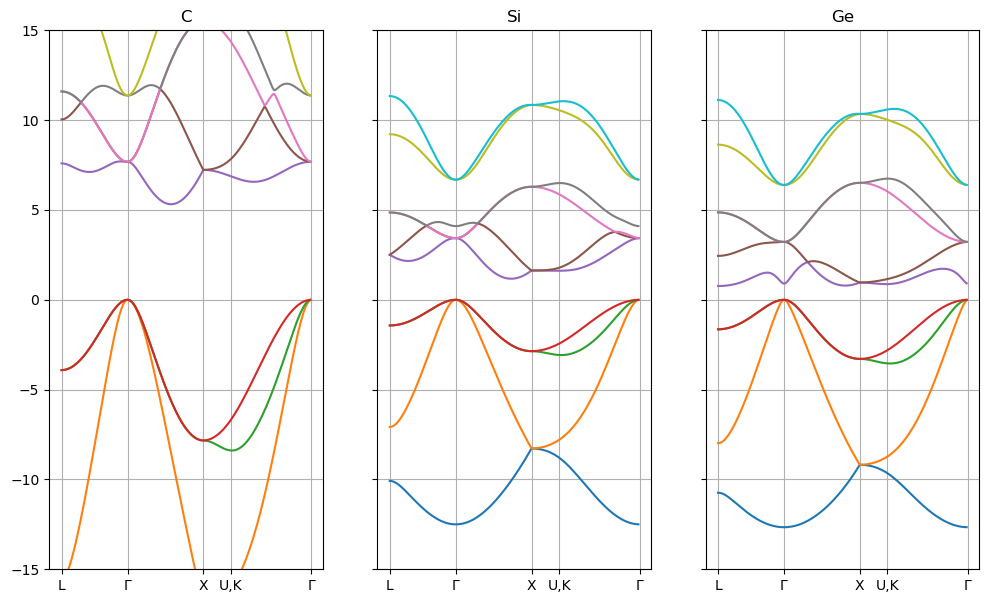

In [7]:
fig, axs = plt.subplots(figsize=(12,7),ncols=3,sharey=True,sharex=True)
i = 0
for name in ['C','Si','Ge']:
    t = Tvogl[name]
    H = hamiltonian_tb10(t,bz_points['G'])
    E = linalg.eigvalsh(H)
    Ev = E[:4].max()   
    KPT,idx = circuit1(0.1)
    EBand = []
    for k in KPT:
        E = linalg.eigvalsh(hamiltonian_tb10(t,k))
        EBand += [E]
    EBand = np.array(EBand)
    Ev    = EBand[:,:4].max()
    EBand = EBand - Ev
    
    ax=axs[i]
    ax.plot(EBand[:,:]);
    ax.set_xticks(idx)
    ax.set_xticklabels(['L','$\Gamma$','X','U,K','$\Gamma$'])
    ax.set_ylim(-15, 15)
    ax.grid(True)
    ax.set_title(name)
    i += 1